In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

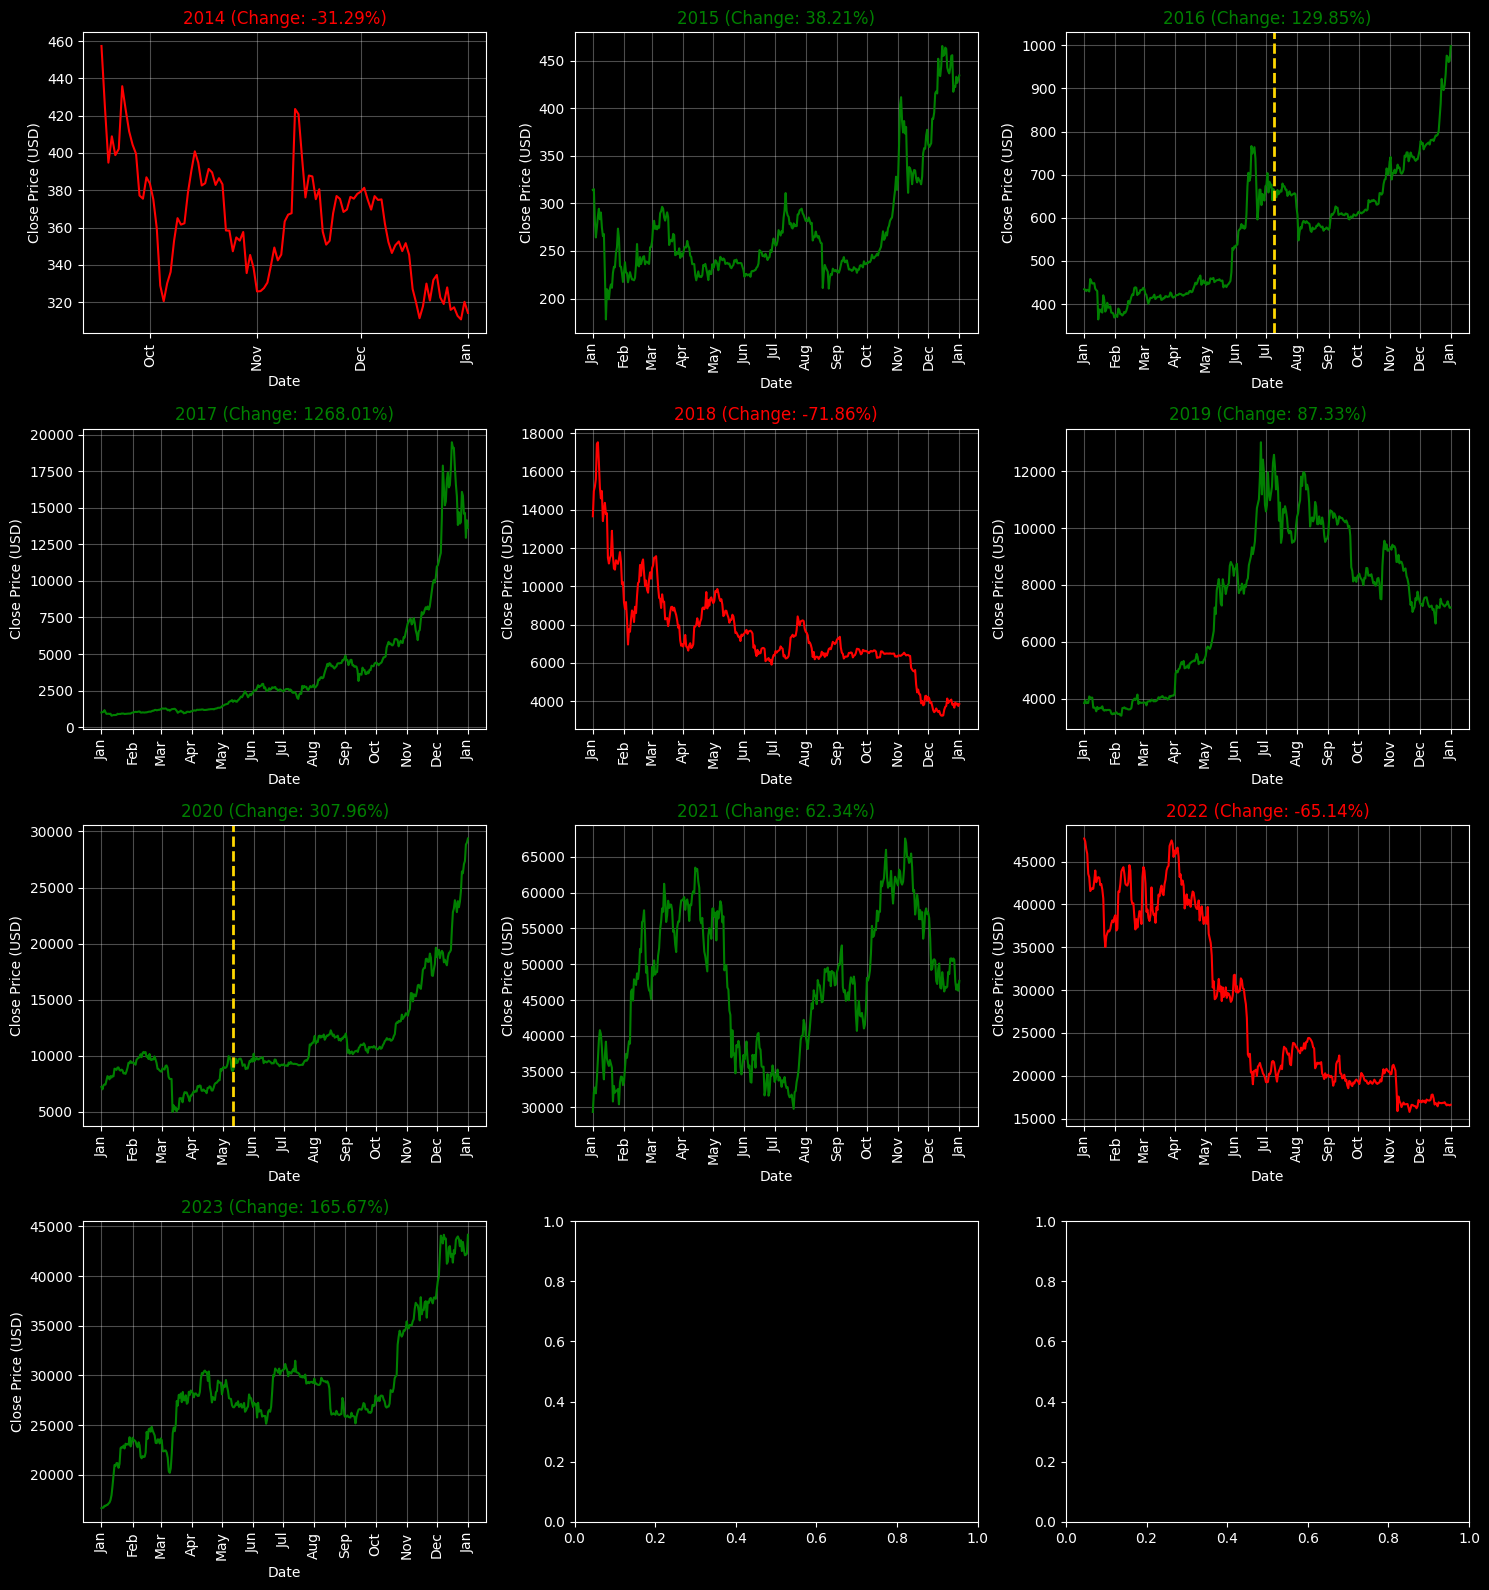

In [8]:
def plot_yearly_btc_price_change_with_custom_grid(file_path, opacity=0.5):
    # Set the plotting style to dark
    plt.style.use('dark_background')

    # Load the data
    btc_data = pd.read_csv(file_path)
    btc_data['Date'] = pd.to_datetime(btc_data['Date']).dt.tz_localize(None)

    # Set date as index
    btc_data.set_index('Date', inplace=True)

    # Bitcoin halvening dates
    halvening_dates = ['2012-11-28', '2016-07-09', '2020-05-11']

    # Get the range of years in the data
    start_year = btc_data.index.year.min()
    end_year = btc_data.index.year.max()

    # Determine the number of subplots required
    num_years = end_year - start_year
    num_rows = int(num_years**0.5) + 1
    num_cols = int(num_years / num_rows) + (num_years % num_rows > 0)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()

    # Loop through each year and plot on the subplots
    for i, year in enumerate(range(start_year, end_year)):
        ax = axes[i]

        # Filter data for the year
        start_date = f"{year}-01-01"
        end_date = f"{year+1}-01-01"
        yearly_data = btc_data[start_date:end_date]

        if not yearly_data.empty:
            # Calculate percent change
            start_price = yearly_data.iloc[0]['Close']
            end_price = yearly_data.iloc[-1]['Close']
            percent_change = ((end_price - start_price) / start_price) * 100

            # Choose color based on increase or decrease
            color = 'green' if percent_change >= 0 else 'red'

            # Plot on the subplot
            ax.plot(yearly_data.index, yearly_data['Close'], color=color)
            ax.set_title(f'{year} (Change: {percent_change:.2f}%)', color=color)
            ax.set_xlabel('Date')
            ax.set_ylabel('Close Price (USD)')
            
            # Set grid with custom opacity
            ax.grid(True, alpha=opacity)

            # Tilt x-axis labels and plot halvening dates
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

            for halvening_date in halvening_dates:
                halvening_datetime = pd.to_datetime(halvening_date)
                if halvening_datetime >= yearly_data.index.min() and halvening_datetime <= yearly_data.index.max():
                    ax.axvline(x=halvening_datetime, color='gold', linestyle='--', linewidth=2)

        # Hide empty subplots
        if i >= num_years:
            ax.set_visible(False)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Run the function with custom grid opacity
plot_yearly_btc_price_change_with_custom_grid('BTC-USD.csv', opacity=0.3)  # Example opacity set to 0.3
